**Description**: Analyzes BERT *and* GPT-2 accuracies for a given number of test
observations (200 or 500). Currently just 2 chains. Need to increase that, but it's too
slow :-(

**Estimated runtime**: ~1 hour (Multi-core isn't working on my machine. Set
`cores=4` in the `model.fit` call if it works for you.)

Note: I'm still learning how to do this type of analysis.

In [1]:
from typing import Literal

import seaborn as sns

import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
sns.set_theme(style="darkgrid")

# Configuration

Which number of test observations do you want to analyze?

In [3]:
num_test: Literal[200, 500] = 200

# Load data

In [4]:
accuracies_home_dir = "accuracies_from_paper"

In [5]:
num_correct_df = utils.load_num_correct_all(accuracies_home_dir, num_test)

In [6]:
equation = "num_correct ~ method + lm_type + (1|dataset/pair)"
id_vars = ["pair", "lm_type", "dataset"]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2133 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
method[extra],0.132,0.003,0.126,0.138,0.0,0.0,3710.0,1549.0,1.0


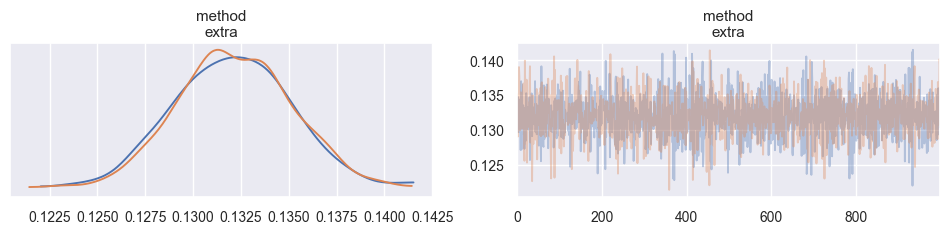

In [7]:
model_control, summary_control, az_summary_control = utils.stat_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
    chains=2,
)

In [8]:
print(model_control)

       Formula: num_correct ~ method + lm_type + (1|dataset/pair)
        Family: poisson
          Link: mu = log
  Observations: 4000
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 4.3301)
            method ~ Normal(mu: 0.0, sigma: 5.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 4.3301))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 4.3301))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2216 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
method[test],0.005,0.003,-0.001,0.011,0.0,0.0,4338.0,1497.0,1.0


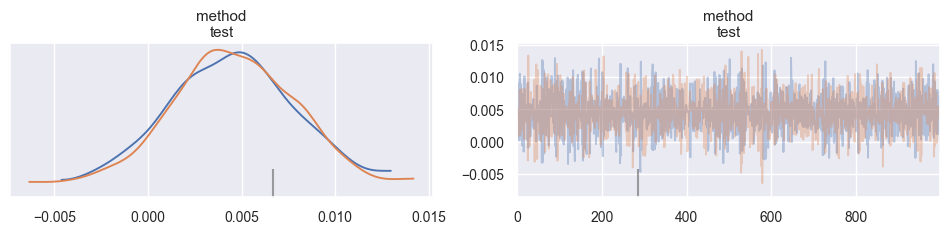

In [9]:
model_bias, summary_bias, az_summary_bias = utils.stat_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
    chains=2,
)

In [10]:
print(model_bias)

       Formula: num_correct ~ method + lm_type + (1|dataset/pair)
        Family: poisson
          Link: mu = log
  Observations: 4000
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 4.3301)
            method ~ Normal(mu: 0.0, sigma: 5.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 4.3301))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 4.3301))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()
